## 문제정의 

### 목표 : 이직 의도에 높은 영향을 주는 변수를 찾아내 이직 의도를 가진 구직자를 찾는다.


빅데이터/데이터사이언스 회사에서 특정 교육과정을 이수한 사람들 중에서 데이터 과학자를 고용하려고 합니다. 

많은 사람들이 교육과정에 등록했고, 회사는 이들 중 어떤 사람이 수료후에 정말 회사에서 일하길 원하는지, 혹은 새로운 일자리를 찾아 떠날지 예측하려고 합니다. 

**예측 모델이 성공적일 경우 회사는 많은 비용을 줄일 수 있고, 교육프로그램을 지원자들에게 맞게 디자인할 수 있고, 지원자들도 효율적으로 분류할 수 있을 것입니다.**

이 데이터 세트는 HR 연구를 위해 현재 직장을 그만두는 요인을 이해하도록 설계되었습니다. 후보자의 자격 증명, 인구 통계, 경험 데이터를 기반으로 통해 후보자가 새 일자리를 찾거나 회사에서 일할 확률을 예측하고 직원 선정에 영향을 미치는 요인을 해석 할 수 있습니다. 

## 가설설정

### 직장인들은 왜 이직을 희망할까? 

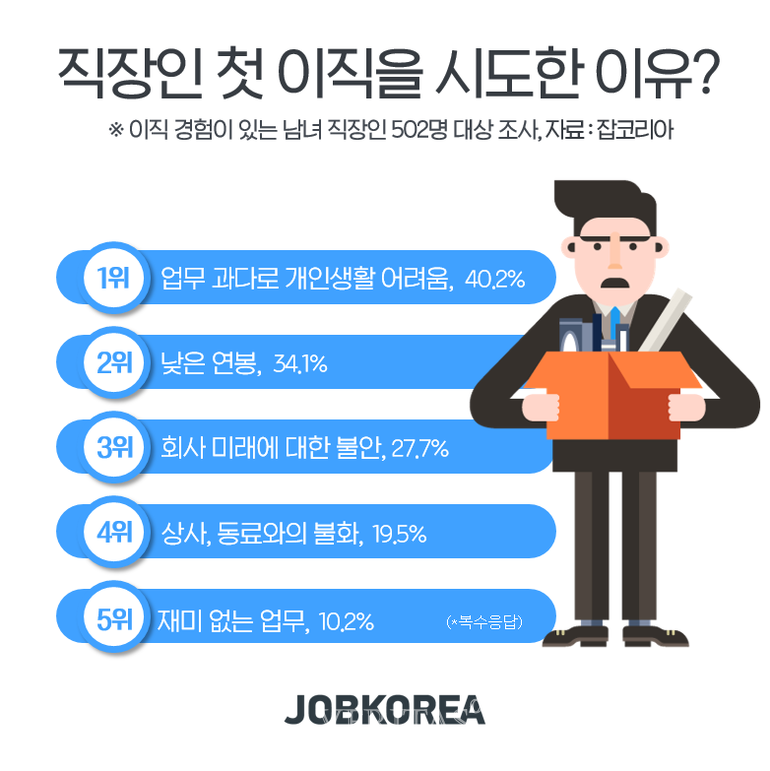

지난해 잡코리아는 직장인들의 첫 이직시기가 빨라졌다며 그 이유를 업무 관련 어려움과, 낮은 연봉, 회사 비전에 관한 불안 등으로 꼽았습니다. 

해당 데이터는 한국 데이터는 아니지만 이직을 희망하는 이유는 세계적으로 공통분모가 있을 것으로 보입니다. 해당 데이터에서는 구직자들의 현재 직장의 업무 평가나 인간관계, 연봉 등을 알 수는 없습니다. 

이직 확률이 높아 보이는 구직자 기준으로 가설을 설정해보면 

1. 고학력자(석사이상) --> 더 많은 기회를 잡을 가능성이 있어 보여 이직 가능성도 높을 것으로 예측됩니다. 

2. 규모가 적은 기업 --> 큰 기업으로 이직하려 할 가능성이 높아 보입니다. 

3. STEM 관련 학위 --> 이공계열 분야의 이직율이 더 높을 것 같습니다. 현재 IT분야는 인재난에 시달리고 있으며, 그 규모가 커지고 있어서 더 기회가 많을 것으로 보입니다. 

## 데이터 전처리 

### 변수들

enrollee_id : Unique ID for candidate / 지원자 아이디
 
city: City code / 도시 코드 

city_ development _index : Developement index of the city (scaled) / 도시 개발 지수 

gender: Gender of candidate / 성별 

relevent_experience: Relevant experience of candidate / 유관 경험

enrolled_university: Type of University course enrolled if any / 대학

education_level: Education level of candidate / 교육 수준

major_discipline :Education major discipline of candidate / 전공

experience: Candidate total experience in years / 경력

company_size: No of employees in current employer's company / 현재 고용된 회사 규모

company_type : Type of current employer / 회사 특징 

lastnewjob: Difference in years between previous job and current job / 이직전 직장과 현재 직장 사이의 기간

training_hours: training hours completed / 교육 이수 시간

target: 0 – Not looking for job change, 1 – Looking for a job change / 0: 이직 의사 없음, 1 - 이직 희망



In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
# 데이터를 불려옵니다.이미 트레인과 데이터 셋으로 나뉘어있는 데이터를 가져왔습니다. 
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT2/aug_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECT2/aug_test.csv")

In [3]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
print("해당 데이터셋에는 {} 개의 행과 {} 개의 칼럼이 있습니다.".format(train.shape[0], train.shape[1]))

해당 데이터셋에는 19158 개의 행과 14 개의 칼럼이 있습니다.


In [6]:
print("해당 데이터셋에는 {} 개의 행과 {} 개의 칼럼이 있습니다.".format(test.shape[0], test.shape[1]))

해당 데이터셋에는 2129 개의 행과 13 개의 칼럼이 있습니다.


#### 타겟 변수 

이직을 희망하지 않는 지원자가 더 많음. 

---


0 - 이직을 희망하지 않음. 

1 - 이직을 희망함. 


---





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


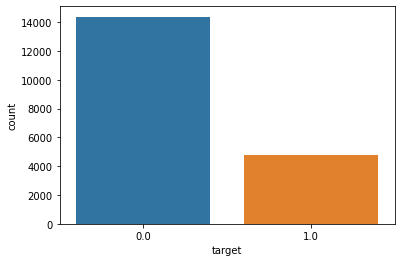

In [7]:
sns.countplot(train['target'])

#### 결측치

In [8]:
# 여러 칼럼에 결측치가 존재. 특히 성별과, 전공, 회사 사이즈와 타입 부분에 많음.
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64


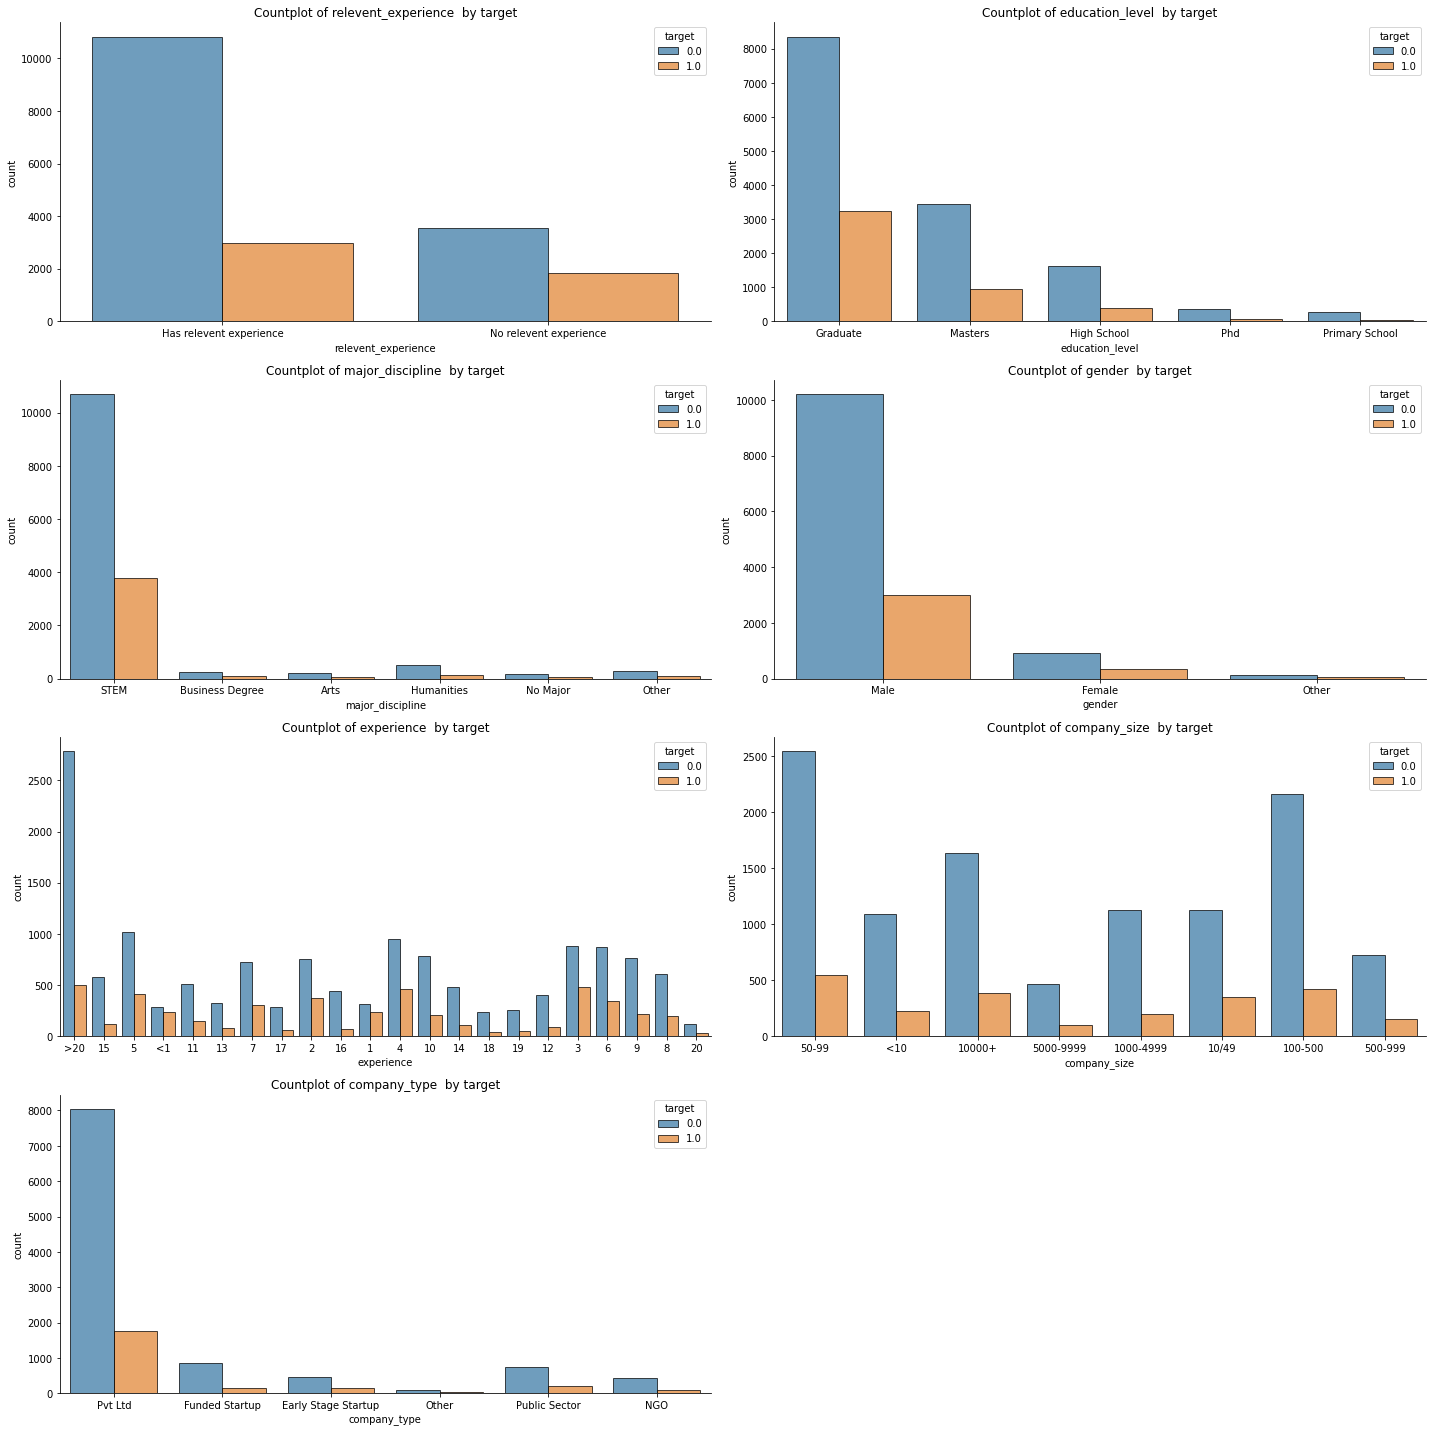

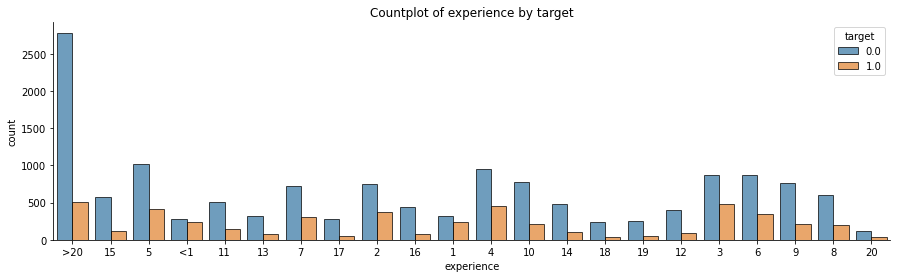

In [9]:
#상관관계를 알아보기 위해 타겟과 여러 칼럼들로 그래프를 그려봤습니다. 
plt.figure(figsize=[20,20])
fft=["relevent_experience", "education_level","major_discipline", "gender", "experience","company_size","company_type"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='target',edgecolor="black", alpha=0.7, data=train)
sns.despine()
plt.title("Countplot of experience by target")
plt.show()

1. 유관 경험 유무와 이직율은 크게 차이나지 않습니다. 

2. 대졸자, 석사 학위 소유자가 이직률이 높았고 박사의 이직률은 적습니다. 

3. STEM 전공자 이직율이 높으나, 이는 STEM 전공자 비율이 높았기에 그렇게 나온 것으로 보이고  남성 이직율이 높은 것도 같은 이유인 것으로 보입니다. 

4. 회사 규모가 적은 곳에서의 이직율이 높습니다.  

#### 어떤 성별이 새로운 직업으로 옮기길 희망할까? 


In [10]:
train.groupby(['target'])['gender'].value_counts()

target  gender
0.0     Male      10209
        Female      912
        Other       141
1.0     Male       3012
        Female      326
        Other        50
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4446f2ec50>,
 [Text(-1.0338168609635852, 0.3757960856467233, 'Male'),
  Text(1.0152889556685183, -0.4233064333287761, 'Female'),
  Text(1.0988179496214665, -0.050981502426628585, 'Other')],
 [Text(-0.6578834569768268, 0.23914296359336934, '88.90%'),
  Text(0.646092971789057, -0.26937682120922113, '9.62%'),
  Text(0.6992477861227514, -0.032442774271490914, '1.48%')])

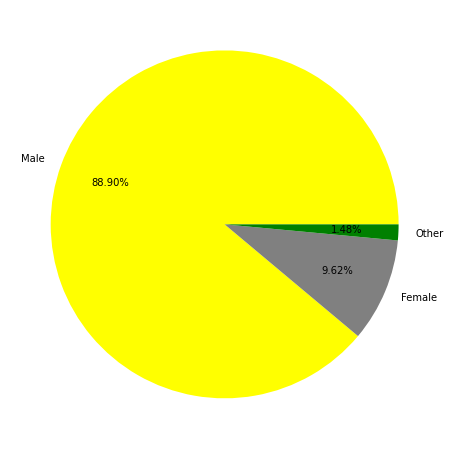

In [11]:
gender = train[train['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = temp, labels = labels , colors = ['yellow','gray','green'], autopct="%.2f%%",pctdistance=0.7)

In [13]:
male_newjob = train[(train['gender']=='Male') & train['target']==1]
female_newjob = train[(train['gender']=='Female') & train['target']==1]

# print
print('{} % of 남자들은 이직을 희망한다'.format(len(male_newjob)/len(train['gender']=='Male')*100))
print('{} % of 여자들은 이직을 희망한다'.format(len(female_newjob)/len(train['gender']=='Female')*100))

15.721891637958032 % of 남자들은 이직을 희망한다
1.7016390019835057 % of 여자들은 이직을 희망한다


#### 교육수준

In [14]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = train['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(train)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

#### 교육 이수 시간

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distributional of training_hours')

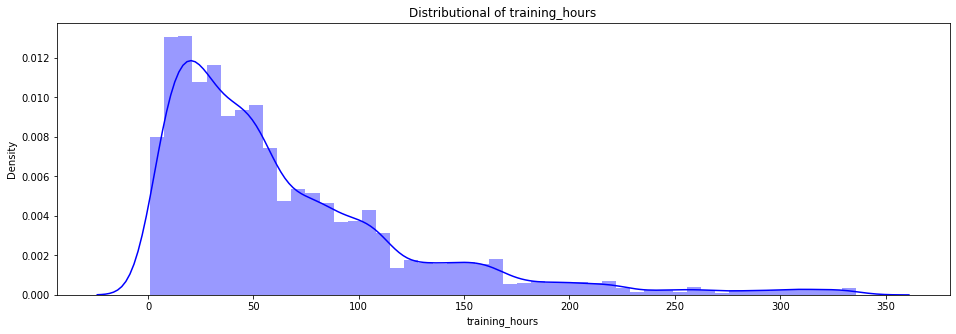

In [15]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
th = sns.distplot(train["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")

#### 교육 수준과 교육 이수 시간

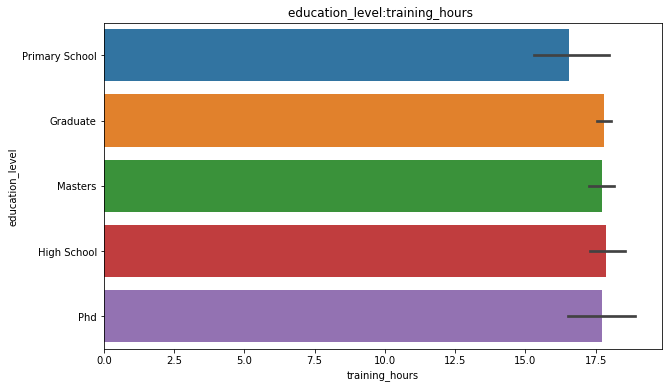

In [16]:
et = train.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

In [17]:
px.histogram(train, x='education_level', color='target')

In [18]:
px.histogram(train, x='experience', color='target')

In [19]:
px.histogram(train, x='relevent_experience', color='target')

#### EDA를 마치고

1. 성별 요인은 이직을 결정하는 중요 요소가 아닌 것으로 보이고(젠더 불균형이 크고, 머물기로 선택한 그룹과 떠나기로 선택한 그룹의 성별 분포는 동일해 보임)

2. 이직 후보자의 72%는 관련 경험이 있으며, 후보자의 88%는 STEM 전공을 가진 사람들이며 남성이다. 이런 불균형을 고려해 파이프라인을 설정해야 할 것으로 보인다.

3. 도시의 발전 수준이 이직 여부를 결정하는 데 영향이 크다는 점도 특이히다. 이는 발달지수가 낮은 도시에 사는 사람들이 더 높은 지수의 도시로 이동해 더 큰 회사로 이직할 기회를 찾고 있다고 볼 수 있기 떄문이다.

4. 관련 경험이없는 사람은 새로운 직업을 찾을 가능성이 더 높습니다.

5. 풀 타임 과정에 등록한 사람들은 새로운 직업을 찾을 가능성이 더 높습니다 (특히 과정에 등록하지 않은 지원자와 비교할 때).

6. 근무 경험이 거의 또는 전혀없는 사람 (즉, 1 년 미만의 근무 경력)이 새로운 직업을 찾을 가능성이 가장 높습니다 (약 50 % 확률).

7. 경험이 새로운 직업을 찾는 사람들의 비율과 (대략) 음의 상관 관계가 있음을 알 수 있습니다. 즉, 경험이 많을수록 찾고있을 가능성이 적습니다.

8. 이전 직업의 수는 새 직업을 찾을 확률과 음의 상관 관계가 있습니다. 이전에 더 많은 직업을 가질수록 새 직업을 찾을 가능성이 낮아집니다.

이상치

In [20]:
# Train descriptive stat
train.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
95%,31782.150000,0.926000,188.000000,1.000000
max,33380.000000,0.949000,336.000000,1.000000


In [21]:
# Test descriptive stat
test.describe(percentiles = [0.25, 0.5, 0.75, 0.95])

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
95%,31760.400000,0.926000,192.000000
max,33353.000000,0.949000,334.000000


In [22]:
px.box(data_frame=train,x='target',y='training_hours')

In [23]:
# 결측치가 너무 많아서 3% 미만의 넌값을 제거했다 

def df_cleaner(df_):
    under_3 = []
    for index, value in df_.isna().sum().iteritems():
        if 0 <  value*100 /len(df_) < 3:
            under_3.append(index)
    df_.dropna(subset=under_3, axis=0, inplace=True)
    return df_

train = df_cleaner(train)
test = df_cleaner(test)

train.shape

(18014, 14)

In [24]:
test.shape

(2018, 13)

#### 상관관계 히트맵

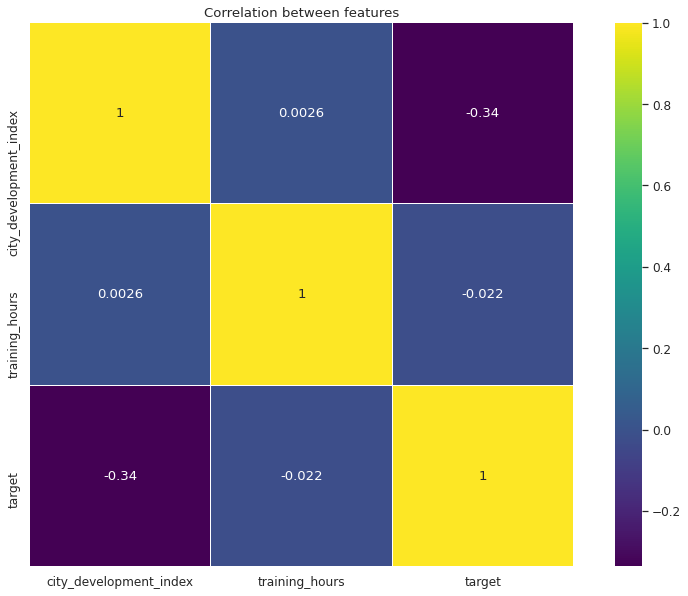

In [28]:
corrMatrix=train[["city","city_development_index","gender","relevent_experience","enrolled_university","education_level",
                   "major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 10))

sns.heatmap(corrMatrix,  linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

### 범주형 변수 변환하기 

['gender'], ['relevent_experience'] , ['enrolled_university'],

['education_level'], ['major_discipline'], ['experience'], ['company_type'], 

['last_new_job'], ['city']

In [29]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122
    
train['gender'] = train['gender'].apply(gender_to_numeric)
train['relevent_experience'] = train['relevent_experience'].apply(rel_experience)
train['enrolled_university'] = train['enrolled_university'].apply(enrollment)
train['education_level'] = train['education_level'].apply(edu_level)
train['major_discipline'] = train['major_discipline'].apply(major)
train['experience'] = train['experience'].apply(experience)
train['company_type'] = train['company_type'].apply(company_t)
train['company_size'] = train['company_size'].apply(company_s)
train['last_new_job'] = train['last_new_job'].apply(last_job)
train['city'] = train['city'].apply(city)

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0,0,0.0,21,NaN,NaN,1,36,1.0
1,29725,1,0.776,1.0,0,0,0,0.0,15,5.0,0.0,5,47,0.0
2,11561,2,0.624,NaN,0,1,0,0.0,5,NaN,NaN,0,83,0.0
4,666,4,0.767,1.0,1,0,1,0.0,21,5.0,1.0,4,8,0.0
5,21651,5,0.764,NaN,1,2,0,0.0,11,NaN,NaN,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0,0,3.0,14,NaN,NaN,1,42,1.0
19154,31398,0,0.920,1.0,1,0,0,0.0,14,NaN,NaN,4,52,1.0
19155,24576,0,0.920,1.0,1,0,0,0.0,21,5.0,0.0,4,44,0.0
19156,5756,33,0.802,1.0,1,0,2,NaN,0,6.0,0.0,2,97,0.0


In [30]:
print("Any missing sample in training set:",train.isnull().values.any())

Any missing sample in training set: True


In [34]:
# 평균으로 nun 값 변환 
train['gender'] = train['gender'].fillna((train['gender'].mean())) 
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mean())) 
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mean()))
train['company_size'] = train['company_size'].fillna((train['company_size'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))
train['company_type'] = train['company_type'].fillna((train['company_type'].mean()))

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0,0,0.000000,21,3.281486,0.685037,1,36,1.0
1,29725,1,0.776,1.000000,0,0,0,0.000000,15,5.000000,0.000000,5,47,0.0
2,11561,2,0.624,1.072998,0,1,0,0.000000,5,3.281486,0.685037,0,83,0.0
4,666,4,0.767,1.000000,1,0,1,0.000000,21,5.000000,1.000000,4,8,0.0
5,21651,5,0.764,1.072998,1,2,0,0.000000,11,3.281486,0.685037,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0,0,3.000000,14,3.281486,0.685037,1,42,1.0
19154,31398,0,0.920,1.000000,1,0,0,0.000000,14,3.281486,0.685037,4,52,1.0
19155,24576,0,0.920,1.000000,1,0,0,0.000000,21,5.000000,0.000000,4,44,0.0
19156,5756,33,0.802,1.000000,1,0,2,0.344795,0,6.000000,0.000000,2,97,0.0


In [35]:
test.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [36]:
test['gender'] = test['gender'].apply(gender_to_numeric)
test['relevent_experience'] = test['relevent_experience'].apply(rel_experience)
test['enrolled_university'] = test['enrolled_university'].apply(enrollment)
test['education_level'] = test['education_level'].apply(edu_level)
test['major_discipline'] = test['major_discipline'].apply(major)
test['experience'] = test['experience'].apply(experience)
test['company_type'] = test['company_type'].apply(company_t)
test['company_size'] = test['company_size'].apply(company_s)
test['last_new_job'] = test['last_new_job'].apply(last_job)
test['city'] = test['city'].apply(city)

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1,0,0.0,9,0.0,NaN,1,21
1,9858,0,0.920,2.0,1,0,0,0.0,5,NaN,0.0,1,98
2,31806,2,0.624,1.0,0,0,2,NaN,0,NaN,0.0,0,15
3,27385,10,0.827,1.0,1,0,1,0.0,11,1.0,0.0,1,39
4,27724,0,0.920,1.0,1,0,0,0.0,21,4.0,0.0,5,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0,0,3.0,16,NaN,4.0,4,15
2125,195,36,0.897,1.0,1,0,1,0.0,18,NaN,NaN,2,30
2126,31762,14,0.887,1.0,0,0,4,NaN,3,NaN,0.0,0,18
2127,7873,12,0.804,1.0,1,1,2,NaN,7,2.0,4.0,1,84


In [37]:
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in test set: True 



In [38]:
test['gender'] = test['gender'].fillna((test['gender'].mean()))
test['enrolled_university'] = test['enrolled_university'].fillna((test['enrolled_university'].mean()))
test['major_discipline'] = test['major_discipline'].fillna((test['major_discipline'].mean()))
test['company_size'] = test['company_size'].fillna((test['company_size'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))
test['company_type'] = test['company_type'].fillna((test['company_type'].mean()))

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1,0,0.000000,9,0.00000,0.703266,1,21
1,9858,0,0.920,2.0,1,0,0,0.000000,5,3.21721,0.000000,1,98
2,31806,2,0.624,1.0,0,0,2,0.329565,0,3.21721,0.000000,0,15
3,27385,10,0.827,1.0,1,0,1,0.000000,11,1.00000,0.000000,1,39
4,27724,0,0.920,1.0,1,0,0,0.000000,21,4.00000,0.000000,5,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0,0,3.000000,16,3.21721,4.000000,4,15
2125,195,36,0.897,1.0,1,0,1,0.000000,18,3.21721,0.703266,2,30
2126,31762,14,0.887,1.0,0,0,4,0.329565,3,3.21721,0.000000,0,18
2127,7873,12,0.804,1.0,1,1,2,0.329565,7,2.00000,4.000000,1,84


In [45]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [46]:

features =["city","city_development_index","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours"]
target = 'target'

In [47]:
#Display first 10 target variables
train[target].head(100).values

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

데이터셋 나누기

In [48]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0,0,0.0,21,3.281486,0.685037,1,36,1.0
1,29725,1,0.776,1.000000,0,0,0,0.0,15,5.000000,0.000000,5,47,0.0
2,11561,2,0.624,1.072998,0,1,0,0.0,5,3.281486,0.685037,0,83,0.0
4,666,4,0.767,1.000000,1,0,1,0.0,21,5.000000,1.000000,4,8,0.0
5,21651,5,0.764,1.072998,1,2,0,0.0,11,3.281486,0.685037,1,24,1.0


In [52]:
#train. validation set으로 분할 

from sklearn.model_selection import train_test_split
X = train[features]
y = train[target]
X_test = test

# Train / Val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,
                                                  stratify = y, shuffle = True)

In [54]:
print('훈련 데이터 개수:',len(y_train),',검증 데이터 개수:',len(y_val),',테스트 데이터 개수:',len(test))

훈련 데이터 개수: 14411 ,검증 데이터 개수: 3603 ,테스트 데이터 개수: 2018


### Modeling

In [55]:
pip install xgboost

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

!pip install optuna
import optuna
from optuna.samplers import TPESampler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

!pip install pyod

from pyod.models.copod import COPOD

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

     |████████████████████████████████| 296kB 5.6MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 41.6MB/s 
     |████████████████████████████████| 112kB 51.6MB/s 
     |████████████████████████████████| 143kB 51.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 481kB 39.2MB/s 
  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156597 sha256=89ac18edeb74b2117765fde7522810920f77e367e12bc8effd37b38e1daeaab8
  Stored in directory: /root/.cache/pip/wheels/74/3f/61/7de6e3cef766d2680a5d81b1a388286e640f6a681eb589d643
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=21d2d64a28a858bb0ee7bfe78fbf38a04cb14338a5dbe85d6eae92ef1fb61f5c
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#### 베이스라인 모델

In [57]:
from sklearn.metrics import accuracy_score
target = 'target'

# 최빈값
baseline =  train[target].mode()[0]

# 예측값
y_pred = [baseline] * len(train[target]) # 모두 0(이직 의사 없음)으로 예측

print('Baseline model 정확도(Accuracy) :', int(accuracy_score(train[target], y_pred).round(2) * 100),'%')

Baseline model 정확도(Accuracy) : 75 %


In [59]:
# confustion matrix plot function 
def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

In [60]:
# 예측값
y_pred_bs = [0] * len(X_val)
y_prob_bs = [0] * len(X_val)

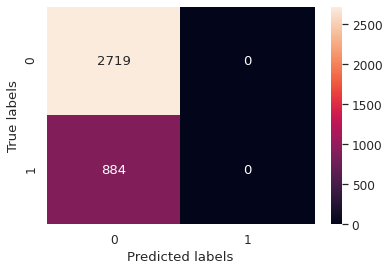

In [61]:
# confusion matrix
plot_confusion_matrix(y_val, y_pred_bs)

In [62]:
# 예측값을 최빈 클래스로 했을때, f1 스코어는 0이다. 
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_bs))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2719
         1.0       0.00      0.00      0.00       884

    accuracy                           0.75      3603
   macro avg       0.38      0.50      0.43      3603
weighted avg       0.57      0.75      0.65      3603



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



분류문제라서 베이스라인 모델은 타겟의 최빈 클래스인 0으로 대답하는 모델로 만들었습니다. 

imbalanced 데이터의 문제가 나타낫습니다. train 데이터내에서 75%를 차지하는 0의 값으로 모두를 예측했을 때 정확도(Accuracy)가 75%가 나옴을 알 수 있습니다. 당연히 f1스코어도 0입니다. 여기서 정확도(Accuracy)는 전체 예측중에서 실제값과 예측값이 같은 비율을 의미합니다. 모델의 평가지표로 정확도를 사용하면 모델의 성능을 제대로 파악하기 힘들 것으로 보입니다. 정확도 대신 다른 평가지표를 사용하여 모델을 평가할 계획입니다. 

### 1. RandomForest

RandomizedSearchCV(랜덤 탐색. 가능한 모든 조합을 시도해 최적의 하이퍼파라미터 값을 찾는다)

incoder 

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForest Modeling

rf = RandomForestClassifier(random_state=101, n_jobs = -1, class_weight='balanced')

# param grid

rf_grid ={
     'criterion' : ['gini', 'entropy'],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [130, 180, 230]
      }

# Tuning

clf = RandomizedSearchCV(
     rf,
     rf_grid,
     n_iter = 10,
     cv = 4,
     random_state = 2
 )

# 학습

clf.fit(X_train, y_train)

# 예측

y_pred_rf = clf.predict(X_val)
y_prob_rf = clf.predict_proba(X_val)[:,1]

In [67]:
print('최적의 하이퍼 파라미터:', clf.best_params_)
print("Accuracy score: ", clf.best_score_)

최적의 하이퍼 파라미터: {'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini'}
Accuracy score:  0.7985565925921132


In [68]:
# Randomforest HyperParameter Tuning Result
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

# 학습
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:,1]

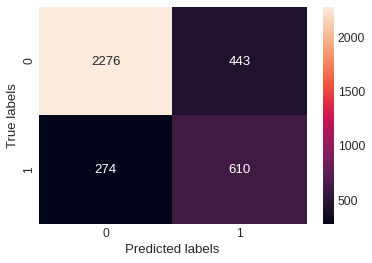

In [69]:
# confusion matrix
plot_confusion_matrix(y_val, y_pred_rf)

In [73]:
from sklearn.metrics import classification_report

# Classification Report
print('검증 정확도: ', accuracy_score(y_pred_rf, y_val))
print (classification_report(y_val, y_pred_rf))

검증 정확도:  0.8009991673605329
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      2719
         1.0       0.58      0.69      0.63       884

    accuracy                           0.80      3603
   macro avg       0.74      0.76      0.75      3603
weighted avg       0.82      0.80      0.81      3603



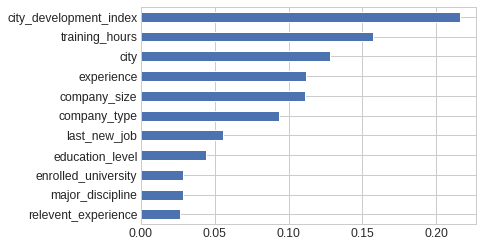

In [75]:
# 특성 중요도 확인
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

importances.sort_values().plot.barh();

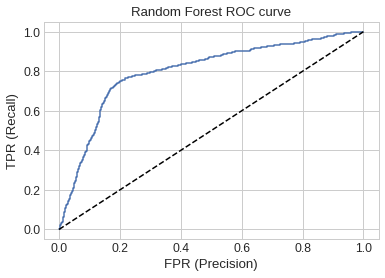

Area under curve (AUC):  0.7994334322406927


In [76]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-whitegrid')

# ROC curve
fpr, tpr, thr = roc_curve(y_val, y_prob_rf)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### 2. XGBoost

In [77]:
np.random.seed(101)
sampler = TPESampler(seed=0)

# 최적화 시킬 모델과 하이퍼파라미터 설정

def create_model(trial):
     max_depth = trial.suggest_int("max_depth", 2, 20)
     n_estimators = trial.suggest_int("n_estimators", 1, 400)
     learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
     gamma = trial.suggest_uniform('gamma', 0.0000001, 1)
     scale_pos_weight = trial.suggest_int("scale_pos_weight", 1, 20)
     model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, gamma=gamma, scale_pos_weight=scale_pos_weight, random_state=0)
     return model


# 최적화 하는 점수를 구하는 함수를 작성

def objective(trial):
     model = create_model(trial)
     model.fit(X_train, y_train)
     preds = model.predict(X_val)
     score = f1_score(y_val, preds)
     return score

# objective에서 설정한 함수의 최대값을 구하는 방향으로 최적화 진행

study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

# 최적화 결과 확인

xgb_params = study.best_params
xgb_params['random_state'] = 0
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

[I 2021-02-25 07:13:39,838] A new study created in memory with name: no-name-e190f933-fb04-40c6-9b47-0e29bba68d04
[I 2021-02-25 07:13:41,946] Trial 0 finished with value: 0.544069640914037 and parameters: {'max_depth': 14, 'n_estimators': 48, 'learning_rate': 0.7151893948534829, 'gamma': 0.6027634157953062, 'scale_pos_weight': 4}. Best is trial 0 with value: 0.544069640914037.
[I 2021-02-25 07:13:42,232] Trial 1 finished with value: 0.5643767996709173 and parameters: {'max_depth': 9, 'n_estimators': 10, 'learning_rate': 0.6235637344296027, 'gamma': 0.3843817688545291, 'scale_pos_weight': 7}. Best is trial 1 with value: 0.5643767996709173.
[I 2021-02-25 07:13:51,686] Trial 2 finished with value: 0.5539240506329114 and parameters: {'max_depth': 14, 'n_estimators': 315, 'learning_rate': 0.4776651695548382, 'gamma': 0.8121687475586203, 'scale_pos_weight': 15}. Best is trial 1 with value: 0.5643767996709173.
[I 2021-02-25 07:14:00,419] Trial 3 finished with value: 0.5405684754521964 and par

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0741468804696766,
              learning_rate=0.05707797443020017, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=229, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

Optuna는 하이퍼파라미터 최적화 테스크를 도와주는 프레임워크인데, 파라미터 범위를 지정해주면 매 시도마다 파라미터를 변경하며 최적의 파라미터를 찾아냅니다. 

In [79]:
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [80]:
# 하이퍼파라미터 최적화 과정을 확인
optuna.visualization.plot_optimization_history(study)

In [111]:
# xgb hyperparameter tuning result
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0741468804696766,
              learning_rate=0.05707797443020017, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=229, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_prob_xgb = xgb.predict_proba(X_val)[:,1]

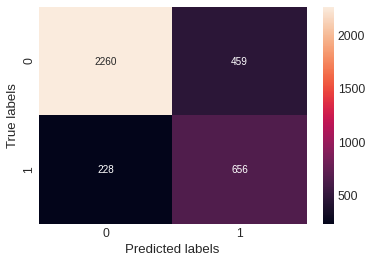

In [82]:
plot_confusion_matrix(y_val, xgb.predict(X_val))

In [84]:
print('검증 정확도: ', accuracy_score(y_pred_xgb, y_val))
print (classification_report(y_val, y_pred_xgb))

검증 정확도:  0.8093255620316403
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      2719
         1.0       0.59      0.74      0.66       884

    accuracy                           0.81      3603
   macro avg       0.75      0.79      0.76      3603
weighted avg       0.83      0.81      0.82      3603



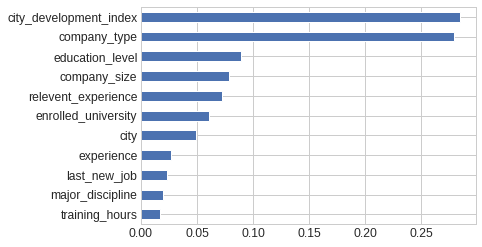

In [90]:
# 특성 중요도 확인

importances = pd.Series(xgb.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

importances.sort_values().plot.barh();

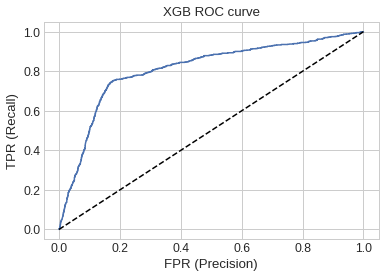

Area under curve (AUC):  0.8084301604762199


In [85]:
# ROC curve
fpr, tpr, thr = roc_curve(y_val, y_prob_xgb)

plt.title('XGB ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### 3. LGBM

In [87]:
cat_cols = ['relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_type', 
            'company_size', 'last_new_job', 'city']

In [88]:
from lightgbm import LGBMClassifier

# 모델
lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='f1',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=2,n_jobs=-1)

# 학습
lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_val , y_val),verbose=50,categorical_feature=cat_cols,early_stopping_rounds= 50)

# 예측
y_pred_lgb = lgb.predict(X_val)
y_prob_lgb = lgb.predict_proba(X_val)[:, 1]

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is ['city', 'company_size', 'company_type', 'education_level', 'enrolled_university', 'experience', 'last_new_job', 'major_discipline', 'relevent_experience']



Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.803632
[100]	valid_0's auc: 0.803488
Early stopping, best iteration is:
[71]	valid_0's auc: 0.804126


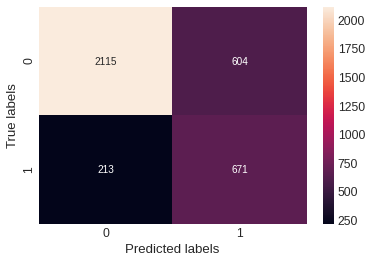

In [91]:
# confusion matrix
plot_confusion_matrix(y_val, y_pred_lgb)

In [93]:
# Classification Report
print('검증 정확도: ', accuracy_score(y_pred_lgb, y_val))
print (classification_report(y_val, y_pred_lgb))

검증 정확도:  0.7732445184568415
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2719
         1.0       0.53      0.76      0.62       884

    accuracy                           0.77      3603
   macro avg       0.72      0.77      0.73      3603
weighted avg       0.81      0.77      0.78      3603



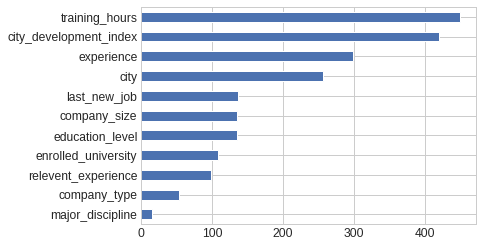

In [94]:
# 특성 중요도 확인
importances = pd.Series(lgb.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

importances.sort_values().plot.barh();

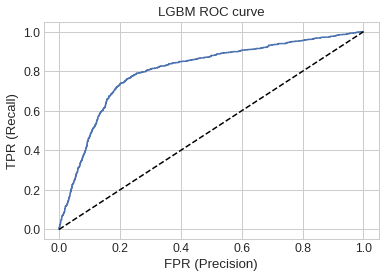

Area under curve (AUC):  0.8041257765448102


In [95]:
# ROC curve
fpr, tpr, thr = roc_curve(y_val, y_prob_lgb)

plt.title('LGBM ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

#### 모델 비교

In [100]:
ypre_0 = y_pred_bs
ypre_1 = y_pred_rf
ypre_2 = y_pred_xgb
ypre_3 = y_pred_lgb

print('검증 정확도 베이스라인 모델: ', accuracy_score(y_pred_bs, y_val))
print('검증 정확도 1: ', accuracy_score(ypre_1, y_val)) # randomforest
print('검증 정확도 2: ', accuracy_score(ypre_2, y_val)) # XGBoost
print('검증 정확도 3: ', accuracy_score(ypre_3, y_val)) #LGBM

검증 정확도 베이스라인 모델:  0.7546489036913683
검증 정확도 1:  0.8009991673605329
검증 정확도 2:  0.8093255620316403
검증 정확도 3:  0.7732445184568415


In [102]:
# 예측 모델에서 중요한 영향을 미친 특성 확인

# 라이브러리 설치
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


     |████████████████████████████████| 112kB 5.6MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [103]:
# Permutation Importance Instance 생성
perm = PermutationImportance(xgb, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1166 ± 0.0073,city_development_index
0.0236 ± 0.0019,company_size
0.0228 ± 0.0026,city
0.0187 ± 0.0024,education_level
0.0082 ± 0.0022,company_type
0.0078 ± 0.0014,last_new_job
0.0053 ± 0.0006,experience
0.0030 ± 0.0013,training_hours
0.0023 ± 0.0015,relevent_experience
0.0001 ± 0.0005,major_discipline


In [124]:
# 불 필요 특성 제거 후 결과 확인
X_train_drop = X_train.drop(['training_hours', 'relevent_experience', 'major_discipline', 'enrolled_university'], axis = 1)
X_val_drop = X_val.drop(['training_hours', 'relevent_experience', 'major_discipline', 'enrolled_university'], axis = 1)

In [126]:
from sklearn.metrics import roc_auc_score

# 학습
xgb.fit(X_train_drop, y_train)

# 예측
y_pred_xgb = xgb.predict(X_val_drop)
y_prob_xgb = xgb.predict_proba(X_val_drop)[:,1]

# 결과 확인
print('After Drop features  AUC_score: ', roc_auc_score(y_val, y_prob_xgb))
print('After Drop features xgb f1_score', f1_score(y_val, y_pred_xgb))

After Drop features  AUC_score:  0.8080761076320646
After Drop features xgb f1_score 0.6523476523476524


In [128]:
# classification report
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      2719
         1.0       0.58      0.74      0.65       884

    accuracy                           0.81      3603
   macro avg       0.75      0.78      0.76      3603
weighted avg       0.83      0.81      0.81      3603



In [149]:
# 하나의 특성이 모델에 전반적으로 어떻게 영향을 주었는지 확인할 수 있는 그래프
# library 설치
!pip install pdpbox

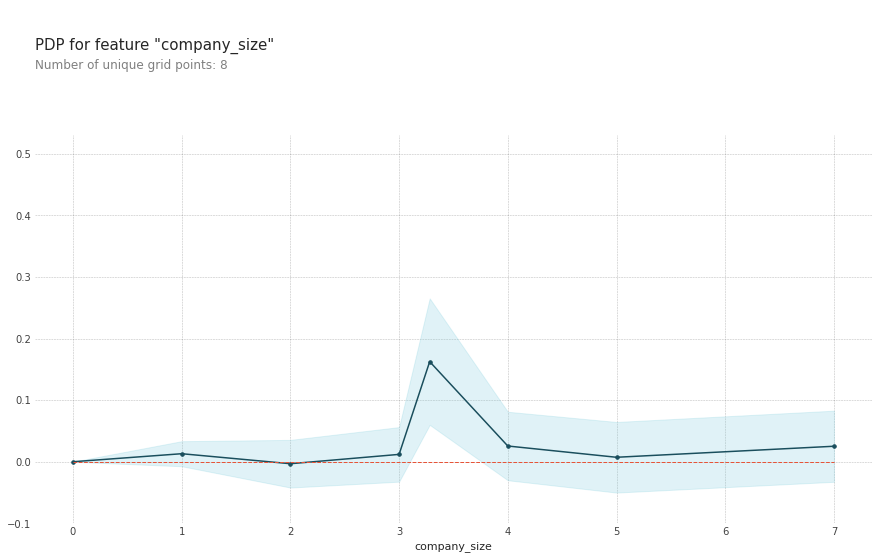

In [158]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.font_manager

# 본 학습 모델
xgb.fit(X_train, y_train)

# 중요했던 특성
selected_feature = 'company_size'

isolated = pdp_isolate(
    model=xgb, 
    dataset=X_val, 
    model_features=X_train.columns, 
    feature=selected_feature,
)
pdp_plot(isolated, feature_name=selected_feature);

In [156]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['company_size', 'city_development_index']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


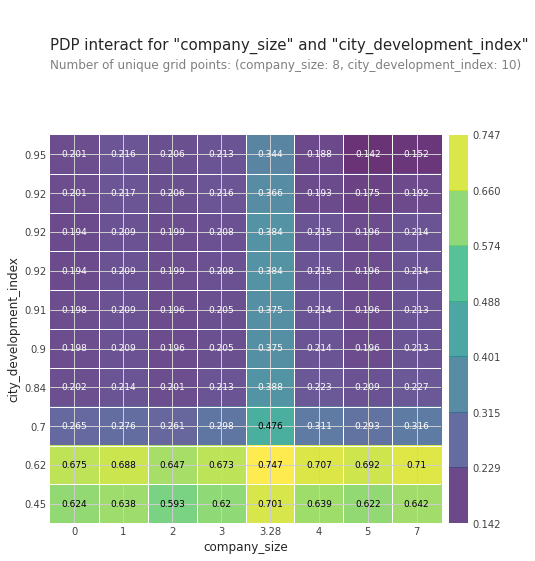

In [157]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);